In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0.5, 1.0, 'IKEA Locations')

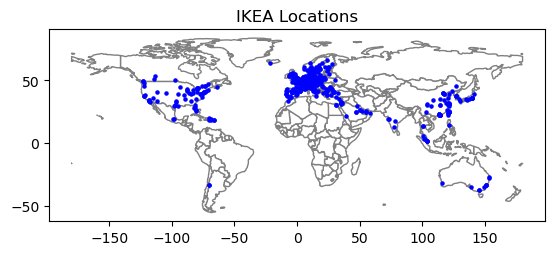

In [2]:
#plot every ikea as a dot (remove antarctica)

IKEA = pd.read_csv("IKEA_warehouse_latlong.csv",
            dtype={'Latitude':float,'Longitude':float, 'Zip': str})

gdf = gpd.GeoDataFrame(IKEA, geometry=gpd.points_from_xy(IKEA.Longitude,
                                                         IKEA.Latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]

ax = world.plot(color='white', edgecolor='grey')
gdf.plot(ax=ax, color='blue', markersize=5)
plt.title("IKEA Locations")

In [3]:
#a count of the number of IKEAs in each country
IKEA_count = IKEA.groupby("Country").count()["Latitude"]
IKEA_count = IKEA_count.to_frame().reset_index()
IKEA_count = IKEA_count.rename(columns= {"Latitude": 'Count'})
IKEA_count

,Country,Count
0,Australia,10
1,Austria,7
2,Bahrain,1
3,Belgium,8
4,Bulgaria,3
...,...,...
56,Turkiye,7
57,Ukraine,1
58,United Arab Emirates,3
59,United Kingdom,21


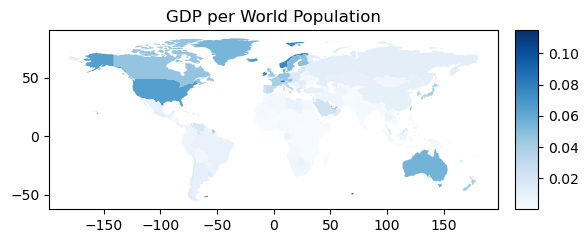

In [30]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
ax.title.set_text('GDP per World Population')
world.plot(column='gdp_per_cap', cmap='Blues', legend=True, ax=ax, cax=cax);


In [5]:
#add a column with the number of ikeas per country
world_new = world.merge(IKEA_count, how = "left", left_on='name', right_on='Country')
world_new["Count"] = world_new["Count"].fillna(0)
world_new = world_new.drop('Country', axis=1)

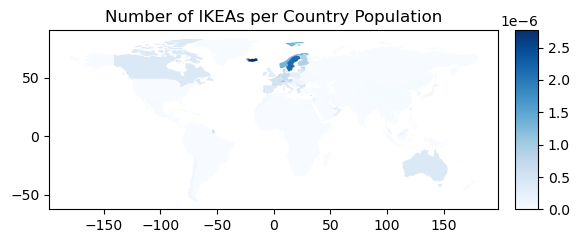

In [6]:
#IKEA count per population
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_new['IKEA_per_cap'] = world_new.Count / world_new.pop_est
ax.title.set_text('Number of IKEAs per Country Population')
world_new.plot(column='IKEA_per_cap', cmap='Blues', legend=True, ax=ax, cax=cax);


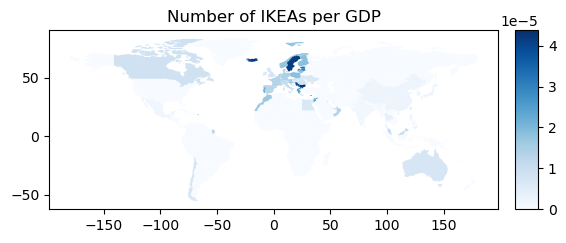

In [7]:
#KEA count per gdp
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_new['IKEA_per_gdp'] = world_new.Count / world_new.gdp_md_est
ax.title.set_text('Number of IKEAs per GDP')
world_new.plot(column='IKEA_per_gdp',  cmap='Blues', legend=True, ax=ax, cax=cax);

#is weirdly dark for some countries that don't have any IKEAs

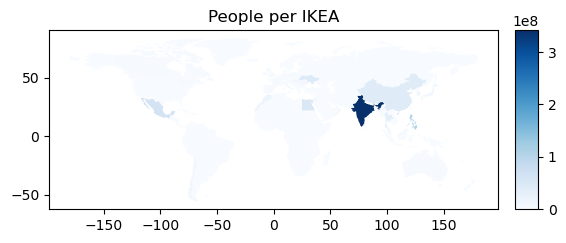

In [13]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_new['people_per_IKEA'] = world_new.pop_est / world_new.Count 
world_new = world_new.replace(np.inf, 0)

ax.title.set_text('People per IKEA')
world_new.plot(column='people_per_IKEA', cmap='Blues', legend=True, ax=ax, cax=cax);